In [ ]:
import os 
import sys
from pathlib import Path
import pandas as p
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
import sklearn
from sklearn.metrics import mean_squared_error, r2_score
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import warnings
np.random.seed(34)
warnings.filterwarnings('ignore')

In [ ]:
from data.from_txt_to_csv import importar_txt_a_dataframe as from_txt 

column_names = [
    "unit_number", "time_cycles",
    "operational_setting_1", "operational_setting_2", "operational_setting_3",
    "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)","xxx","xxxs"
    ]
# Leer el archivo txt (separado por espacios)
df_train = pd.read_csv("data/train_FD001.txt", sep=" ", header=None)
df_train.columns = column_names
train_file = df_train.iloc[:, :-2]

y_rul= pd.read_csv("data/RUL_FD001.txt", sep=" ", header=None)



In [ ]:
# Revisión del archivo de train
train_file.head(5)

,unit_number,time_cycles,operational_setting_1,operational_setting_2,operational_setting_3,(Fan inlet temperature) (◦R),(LPC outlet temperature) (◦R),(HPC outlet temperature) (◦R),(LPT outlet temperature) (◦R),(Fan inlet Pressure) (psia),(bypass-duct pressure) (psia),(HPC outlet pressure) (psia),(Physical fan speed) (rpm),(Physical core speed) (rpm),(Engine pressure ratio(P50/P2),(HPC outlet Static pressure) (psia),(Ratio of fuel flow to Ps30) (pps/psia),(Corrected fan speed) (rpm),(Corrected core speed) (rpm),(Bypass Ratio),(Burner fuel-air ratio),(Bleed Enthalpy),(Required fan speed),(Required fan conversion speed),(High-pressure turbines Cool air flow),(Low-pressure turbines Cool air flow)
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,21.61,554.36,2388.06,9046.19,1.3,47.47,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,21.61,553.75,2388.04,9044.07,1.3,47.49,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,21.61,554.26,2388.08,9052.94,1.3,47.27,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,21.61,554.45,2388.11,9049.48,1.3,47.13,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,21.61,554.00,2388.06,9055.15,1.3,47.28,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


In [ ]:
# Revisión del archivo de RUL dado en el dataset. 
y_rul.head(5)

,0,1
0,112,NaN
1,98,NaN
2,69,NaN
3,82,NaN
4,91,NaN


In [134]:
csv_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   unit_number                              20631 non-null  int64  
 1   time_cycles                              20631 non-null  int64  
 2   operational_setting_1                    20631 non-null  float64
 3   operational_setting_2                    20631 non-null  float64
 4   operational_setting_3                    20631 non-null  float64
 5   (Fan inlet temperature) (◦R)             20631 non-null  float64
 6   (LPC outlet temperature) (◦R)            20631 non-null  float64
 7   (HPC outlet temperature) (◦R)            20631 non-null  float64
 8   (LPT outlet temperature) (◦R)            20631 non-null  float64
 9   (Fan inlet Pressure) (psia)              20631 non-null  float64
 10  (bypass-duct pressure) (psia)            20631

In [135]:
csv_file.isnull().sum()

unit_number                                0
time_cycles                                0
operational_setting_1                      0
operational_setting_2                      0
operational_setting_3                      0
(Fan inlet temperature) (◦R)               0
(LPC outlet temperature) (◦R)              0
(HPC outlet temperature) (◦R)              0
(LPT outlet temperature) (◦R)              0
(Fan inlet Pressure) (psia)                0
(bypass-duct pressure) (psia)              0
(HPC outlet pressure) (psia)               0
(Physical fan speed) (rpm)                 0
(Physical core speed) (rpm)                0
(Engine pressure ratio(P50/P2)             0
(HPC outlet Static pressure) (psia)        0
(Ratio of fuel flow to Ps30) (pps/psia)    0
(Corrected fan speed) (rpm)                0
(Corrected core speed) (rpm)               0
(Bypass Ratio)                             0
(Burner fuel-air ratio)                    0
(Bleed Enthalpy)                           0
(Required 

In [136]:
csv_file.describe().T

,count,mean,std,min,25%,50%,75%,max
unit_number,20631.0,51.506568,2.922763e+01,1.0000,26.0000,52.0000,77.0000,100.0000
time_cycles,20631.0,108.807862,6.888099e+01,1.0000,52.0000,104.0000,156.0000,362.0000
operational_setting_1,20631.0,-0.000009,2.187313e-03,-0.0087,-0.0015,0.0000,0.0015,0.0087
operational_setting_2,20631.0,0.000002,2.930621e-04,-0.0006,-0.0002,0.0000,0.0003,0.0006
operational_setting_3,20631.0,100.000000,0.000000e+00,100.0000,100.0000,100.0000,100.0000,100.0000
(Fan inlet temperature) (◦R),20631.0,518.670000,0.000000e+00,518.6700,518.6700,518.6700,518.6700,518.6700
(LPC outlet temperature) (◦R),20631.0,642.680934,5.000533e-01,641.2100,642.3250,642.6400,643.0000,644.5300
(HPC outlet temperature) (◦R),20631.0,1590.523119,6.131150e+00,1571.0400,1586.2600,1590.1000,1594.3800,1616.9100
(LPT outlet temperature) (◦R),20631.0,1408.933782,9.000605e+00,1382.2500,1402.3600,1408.0400,1414.5550,1441.4900
(Fan inlet Pressure) (psia),20631.0,14.620000,1.776400e-15,14.6200,14.6200,14.6200,14.6200,14.6200


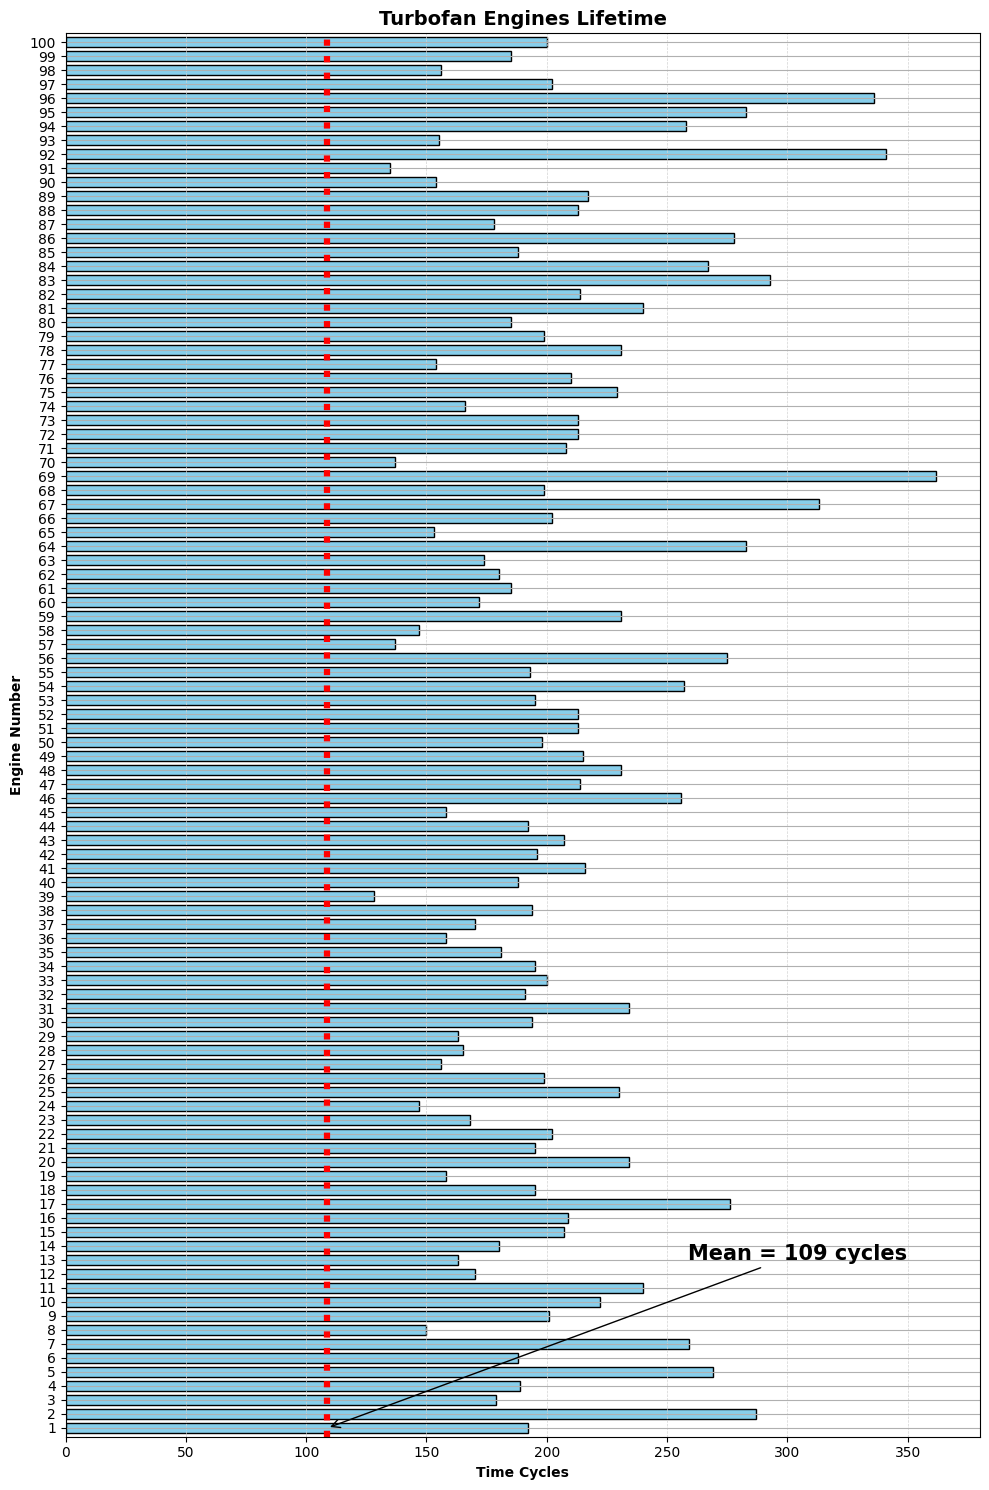

In [137]:
# Group by unit_number and get the max time_cycle for each unit
max_time_cycles = csv_file.groupby('unit_number')['time_cycles'].max()
mean_time_cycles = csv_file['time_cycles'].mean(    )

# Plotting
plt.subplots(figsize=(10, 15))
ax = max_time_cycles.plot(kind='barh', width=0.75, color= 'skyblue', edgecolor='black')
plt.title('Turbofan Engines Lifetime', fontweight='bold', fontsize=14)
plt.xlabel('Time Cycles', fontweight='bold', fontsize=10)
plt.ylabel('Engine Number', fontweight='bold', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, which='major', axis='x', linestyle='--', linewidth=0.5, color='#d3d3d3')

ax.axvline(mean_time_cycles, ls='dotted', color='r', linewidth=4.5, label='Mean Time Cycle') 
plt.annotate('Mean = 109 cycles', 
             xy=(mean_time_cycles, 0), 
             xytext=(mean_time_cycles + 150, 12),  # adjust offset as needed
             arrowprops=dict(arrowstyle='->', color='black'),
             fontsize=15, fontweight='bold',  color='black')

plt.grid(True)
plt.tight_layout()
plt.show()


array([[<Axes: title={'center': '(Fan inlet temperature) (◦R)'}>,
        <Axes: title={'center': '(LPC outlet temperature) (◦R)'}>,
        <Axes: title={'center': '(HPC outlet temperature) (◦R)'}>,
        <Axes: title={'center': '(LPT outlet temperature) (◦R)'}>,
        <Axes: title={'center': '(Fan inlet Pressure) (psia)'}>],
       [<Axes: title={'center': '(bypass-duct pressure) (psia)'}>,
        <Axes: title={'center': '(HPC outlet pressure) (psia)'}>,
        <Axes: title={'center': '(Physical fan speed) (rpm)'}>,
        <Axes: title={'center': '(Physical core speed) (rpm)'}>,
        <Axes: title={'center': '(Engine pressure ratio(P50/P2)'}>],
       [<Axes: title={'center': '(HPC outlet Static pressure) (psia)'}>,
        <Axes: title={'center': '(Ratio of fuel flow to Ps30) (pps/psia)'}>,
        <Axes: title={'center': '(Corrected fan speed) (rpm)'}>,
        <Axes: title={'center': '(Corrected core speed) (rpm)'}>,
        <Axes: title={'center': '(Bypass Ratio) '}>],
 

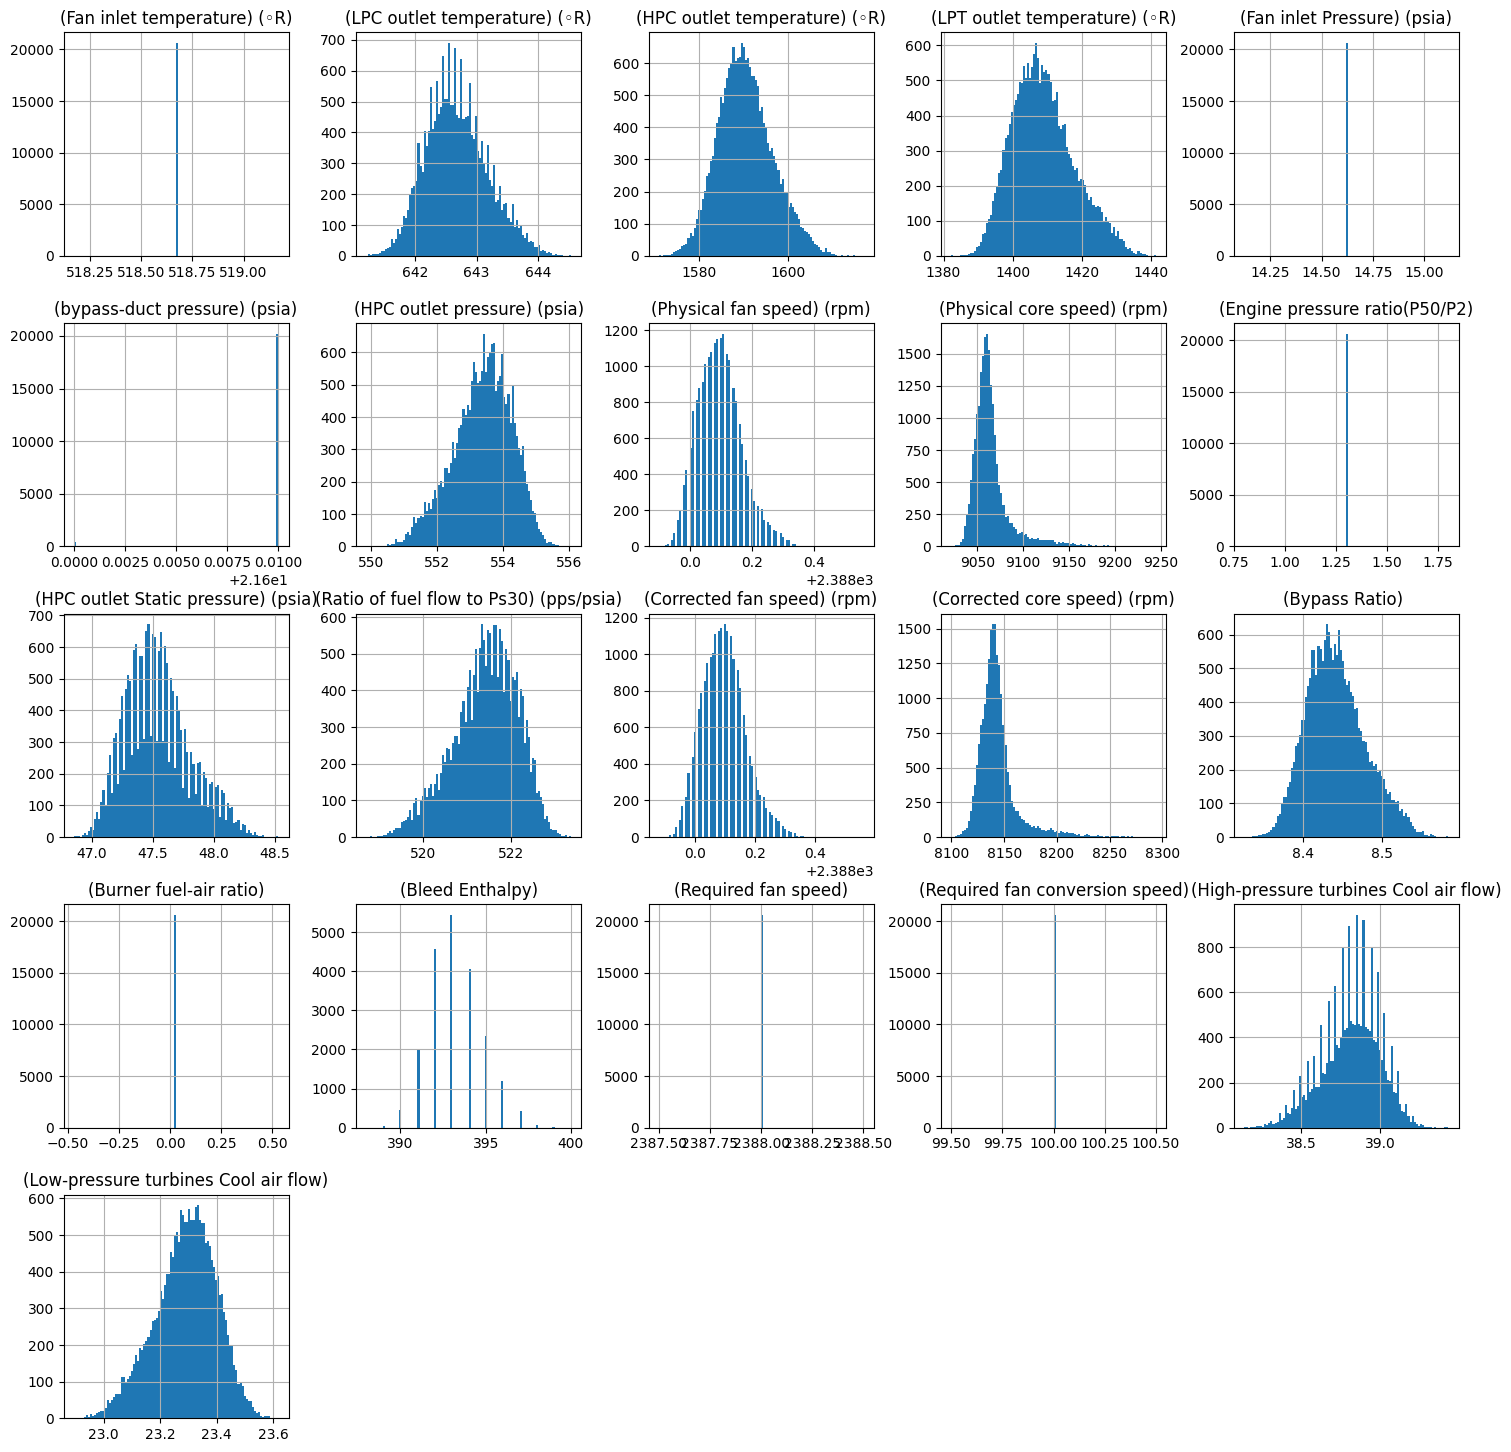

In [138]:
sensor_columns = [
  "(Fan inlet temperature) (◦R)",
    "(LPC outlet temperature) (◦R)",
    "(HPC outlet temperature) (◦R)",
    "(LPT outlet temperature) (◦R)",
    "(Fan inlet Pressure) (psia)",
    "(bypass-duct pressure) (psia)",
    "(HPC outlet pressure) (psia)",
    "(Physical fan speed) (rpm)",
    "(Physical core speed) (rpm)",
    "(Engine pressure ratio(P50/P2)",
    "(HPC outlet Static pressure) (psia)",
    "(Ratio of fuel flow to Ps30) (pps/psia)",
    "(Corrected fan speed) (rpm)",
    "(Corrected core speed) (rpm)",
    "(Bypass Ratio) ",
    "(Burner fuel-air ratio)",
    "(Bleed Enthalpy)",
    "(Required fan speed)",
    "(Required fan conversion speed)",
    "(High-pressure turbines Cool air flow)",
    "(Low-pressure turbines Cool air flow)"
]

csv_file[sensor_columns].hist(bins=100, figsize=(18, 18))

Text(0.5, 9.444444444444459, 'max time cycle')

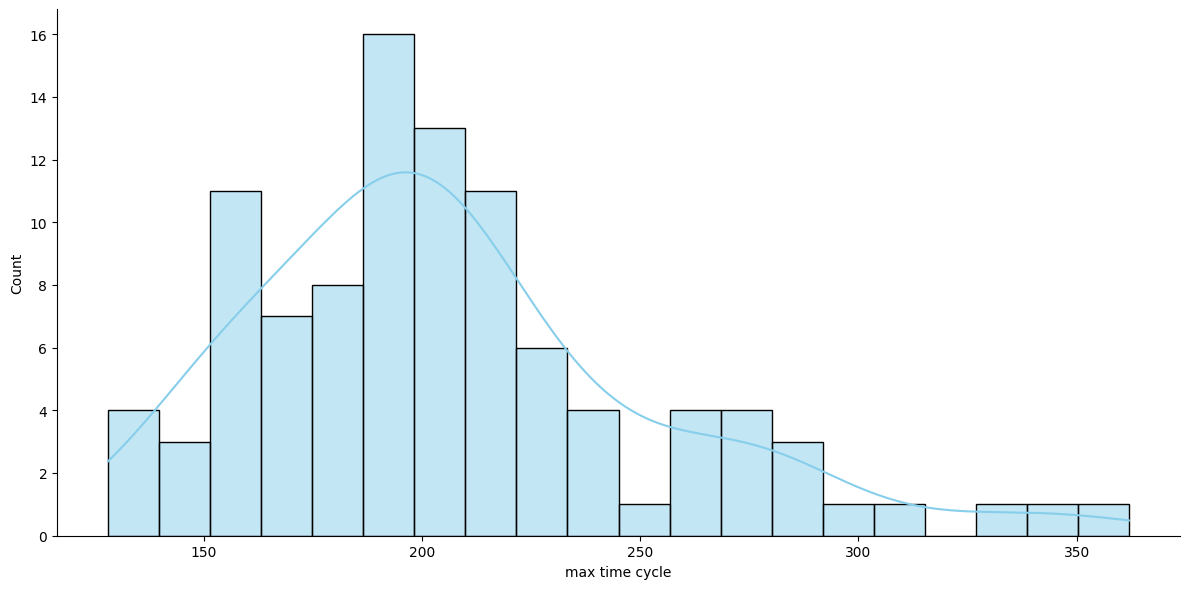

In [139]:
#Distribution of maximum time cycles
index_names = ['unit_number', 'time_cycles']
max_time_cycles = csv_file[index_names].groupby('unit_number').max()

sns.displot(max_time_cycles['time_cycles'],kde=True,bins=20,height=6,aspect=2,  color= 'skyblue', edgecolor='black')
plt.xlabel('max time cycle')